<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Van Westendorp's Price Sensitivity Meter (PSM)
</h1><center/>

**Link to the article** : https://medium.com/@soulawalid/van-westendorps-price-sensitivity-meter-psm-0b657d6862b7?sk=9c324720ded94b670171ef0749105ef0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define the data
data = {
    'Price (€)': [17, 18, 19, 20, 21, 22, 23, 24],
    'Too Expensive': [6, 13, 16, 28, 29, 46, 49, 38],
    'Too Cheap': [25, 40, 48, 41, 32, 20, 13, 6]
}

df = pd.DataFrame(data)
df

,Price (€),Too Expensive,Too Cheap
0,17,6,25
1,18,13,40
2,19,16,48
3,20,28,41
4,21,29,32
5,22,46,20
6,23,49,13
7,24,38,6


In [5]:
total_respondents = df['Too Expensive'].sum()  # Total respondents is 225

# Calculate percentage for each response
df['% Too Expensive'] = (df['Too Expensive'] / total_respondents) * 100
df['% Too Cheap'] = (df['Too Cheap'] / total_respondents) * 100

# Calculate cumulative percentages for "Too Expensive" (ascending price)
df['Cumulative Too Expensive'] = df['% Too Expensive'].cumsum()

# Calculate cumulative percentages for "Too Cheap" (descending price)
# Sort the dataframe in descending order of price
df_sorted_cheap = df.sort_values(by='Price (€)', ascending=False).reset_index(drop=True)
df_sorted_cheap['Cumulative Too Cheap'] = df_sorted_cheap['% Too Cheap'].cumsum()

# Merge the cumulative "Too Cheap" back to the main dataframe
df = df.sort_values(by='Price (€)', ascending=True).reset_index(drop=True)
df['Cumulative Too Cheap'] = df_sorted_cheap.sort_values(by='Price (€)', ascending=True)['Cumulative Too Cheap']

# Cap the cumulative percentages at 100%
df['Cumulative Too Expensive'] = df['Cumulative Too Expensive'].clip(upper=100)
df['Cumulative Too Cheap'] = df['Cumulative Too Cheap'].clip(upper=100)

# Display the dataframe
print("Cumulative Data:")
df[['Price (€)', 'Too Expensive', '% Too Expensive', 'Cumulative Too Expensive',
          'Too Cheap', '% Too Cheap', 'Cumulative Too Cheap']]

Cumulative Data:


,Price (€),Too Expensive,% Too Expensive,Cumulative Too Expensive,Too Cheap,% Too Cheap,Cumulative Too Cheap
0,17,6,2.666667,2.666667,25,11.111111,2.666667
1,18,13,5.777778,8.444444,40,17.777778,8.444444
2,19,16,7.111111,15.555556,48,21.333333,17.333333
3,20,28,12.444444,28.000000,41,18.222222,31.555556
4,21,29,12.888889,40.888889,32,14.222222,49.777778
5,22,46,20.444444,61.333333,20,8.888889,71.111111
6,23,49,21.777778,83.111111,13,5.777778,88.888889
7,24,38,16.888889,100.000000,6,2.666667,100.000000


In [12]:
# Calculate the difference between Cumulative Too Expensive and Cumulative Too Cheap
df['Difference'] = abs(df['Cumulative Too Expensive'] - (100 - df['Cumulative Too Cheap']))

# Find the row with the minimum difference
opp_row = df.loc[df['Difference'].idxmin()]
optimal_price = opp_row['Price (€)']

print(f"\nOptimal Price Point (OPP) is approximately: {optimal_price}€")


Optimal Price Point (OPP) is approximately: 21.0€


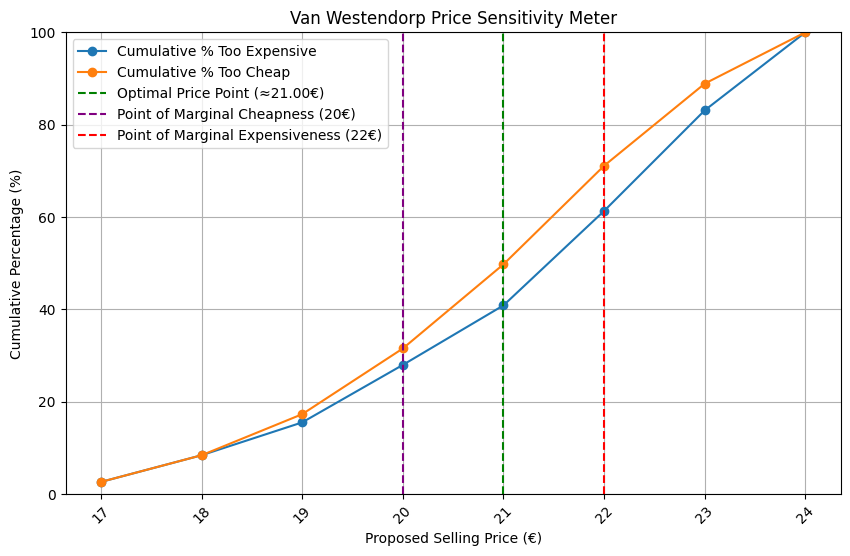

In [14]:
# Plot the cumulative curves
plt.figure(figsize=(10, 6))

# Plot Cumulative Too Expensive
plt.plot(df['Price (€)'], df['Cumulative Too Expensive'], label='Cumulative % Too Expensive', marker='o')

# Plot Cumulative Too Cheap
plt.plot(df['Price (€)'], df['Cumulative Too Cheap'], label='Cumulative % Too Cheap', marker='o')

# Determine Optimal Price Point (OPP)
df['Difference'] = abs(df['Cumulative Too Expensive'] - (100 - df['Cumulative Too Cheap']))  # Corrected here
opp_row = df.loc[df['Difference'].idxmin()]
optimal_price = opp_row['Price (€)']

# Plot OPP
plt.axvline(x=optimal_price, color='green', linestyle='--', label=f'Optimal Price Point (≈{optimal_price:.2f}€)')

# Point of Marginal Cheapness (PMC) at 20€
pmc_price = 20
plt.axvline(x=pmc_price, color='purple', linestyle='--', label='Point of Marginal Cheapness (20€)')

# Point of Marginal Expensiveness (PME) at 22€
pme_price = 22
plt.axvline(x=pme_price, color='red', linestyle='--', label='Point of Marginal Expensiveness (22€)')

# Titles and Labels
plt.title('Van Westendorp Price Sensitivity Meter')
plt.xlabel('Proposed Selling Price (€)')
plt.ylabel('Cumulative Percentage (%)')
plt.legend()
plt.grid(True)

# Ensure proper ticks and limits
plt.xticks(df['Price (€)'], rotation=45)
plt.ylim(0, 100)

plt.show()